# Importance of Standardization


## Feature Scaling

Recall that the process of scaling the values of different features to a similar range is called **feature scaling**. Feature scaling plays an important role in gradient descent.

Consider two features: first feature's values range from 0 to 1 and second feature's values range from 100 to 1000. Let $\beta_1$ be the parameter corresponding to the first feature and $\beta_2$ be the parameter corresponding to the second feature. If we calculate the gradients with respect to $\beta_1$ and $\beta_2$, we find that the gradient associated with $\beta_1$ will be much smaller than the gradient associated with $\beta_2$. If you remember, there was a similar scenario in the previous notebook where the gradient with respect to the parameter corresponding to the feature 'TV' was much larger than the gradient with respect to the parameter corresponding to the feature 'radio'.
When you update the weights using these gradients, the weights will be updated very unevenly. This results in slow convergence of Gradient Descent. 
So to speed up the convergence, we scale the features to a similar range. The other reason for scaling the features to a similar range is to prevent the features with larger values dominate the ones with smaller values.



The step size in the gradient descent actually depends on two factors: the learning rate and the gradient. If the gradient is large, we cannot use a large learning rate. You saw this in the previous notebook where the gradients were so large that we had to use a learning rate of $0.0000003$. So while scaling the features, we scale them to have **small** values of similar range. This results in smaller gradients which allows us to use a larger learning rate. As a consequence, gradient descent converges faster. 





### Feature Scaling Techniques

In this notebook, you will learn about the two most popular techniques for feature scaling:

1. Standardization

2. Min-Max Scaling


#### Standardization

Standardization scales the features to have values with 0 mean and unit variance.

For each value of $i^{th}$ feature, $x_i$, standardization scales the value as:

$$
x_i = \frac{x_i - \mu_i}{\sigma_i}
$$

where, 

$\mu_i$ = mean of $i^{th}$ feature

$\sigma_i$ = standard deviation of $i^{th}$ feature

Standardization is used when you want the data to be normally distributed. Many machine learning algorithms like linear regression, logistic regression and principal component analysis assume the data to be normally distributed. Also, standardization is relatvely less prone to outliers when compared to min-max scaling.

#### Min-Max Scaling

Min-Max scaling scales the features to have values between 0 and 1.

For each value of $i^{th}$ feature, $x_i$, min-max scaling scales the value as:

$$
x_i = \frac{x_i - \text{min}(x_i)}{\text{max}(x_i) - \text{min}(x_i)}
$$

where, 

$\text{min}(x_i)$ = minimum of $i^{th}$ feature

$\text{max}(x_i)$ = maximum of $i^{th}$ feature

Min-max scaling can be used when you don't have any assumptions about the distribution of data. Algorithms such as decision tree, random forest, Naive Bayes, etc do not assume the data to be normally distributed. However, min-max scaling is highly affected by outliers because of its use of minimum and maximum values. So we prefer standardization over min-max scaling in general.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

## Gradient Descent with Feature Scaling in Advertisement Dataset

Now that you know the importance of feature scaling and some techniques to scale the features, let's see how it improves our linear regression model on the same old Advertisement Dataset. 

Let's import the dataset

In [ ]:
data_path = "https://www.statlearning.com/s/Advertising.csv" 
     

# Read the CSV data from the link
data_df = pd.read_csv(data_path,index_col=0)

# Print out first 5 samples from the DataFrame
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Let's extract our feature matrix `X` and the labels `y` from the dataset.

In [ ]:
X = data_df[['TV', 'radio', 'newspaper']].values

# Adding the column of ones in X
X = np.concatenate([np.ones((X.shape[0],1)),X], axis=1)

y = data_df['sales'].values.reshape(-1,1)

n = X.shape[0] # number of samples (rows)
d = X.shape[1] # number of features (columns)

print("no. of samples (n): ", n)
print("no. of features (d): ", d)

no. of samples (n):  200
no. of features (d):  4


### Feature Scaling

Before scaling the features let's see the range of values that different features can have.



In [ ]:
data_df.iloc[:, :3].describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


The feature 'TV' can have values between $0.7$ and $296.4$ with a mean of $147.04$. Similarly the feature 'radio' can have values between $0$ and $49.6$ with a mean of $23.26$. Finally, the feature 'newspaper' can have values between $0.3$ and $114$ with a mean of $30.55$. As you can see, the range of values that the features can have is quite different. So let's scale the values of all these features to have $0$ mean and unit variance using **standardization**.

In [ ]:
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()  # x_i = (x_i - mean(x_i)) / std(x_i)
X[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()  
X[:,3] = (X[:,3] - X[:,3].mean()) / X[:,3].std()

print("Mean of TV: {:.2f}". format(X[:,1].mean()))
print("Mean of radio: {:.2f}". format(X[:,2].mean()))
print("Mean of newspaper: {:.2f}". format(X[:,3].mean()))

print("Std of TV: {:.2f}". format(X[:,1].std()))
print("Std of radio: {:.2f}". format(X[:,2].std()))
print("Std of newspaper: {:.2f}". format(X[:,3].std()))


pd.DataFrame(X, columns=['_', 'TV', 'radio', 'newspaper'])

Mean of TV: 0.00
Mean of radio: -0.00
Mean of newspaper: 0.00
Std of TV: 1.00
Std of radio: 1.00
Std of newspaper: 1.00


,_,TV,radio,newspaper
0,1.0,0.969852,0.981522,1.778945
1,1.0,-1.197376,1.082808,0.669579
2,1.0,-1.516155,1.528463,1.783549
3,1.0,0.052050,1.217855,1.286405
4,1.0,0.394182,-0.841614,1.281802
...,...,...,...,...
195,1.0,-1.270941,-1.321031,-0.771217
196,1.0,-0.617035,-1.240003,-1.033598
197,1.0,0.349810,-0.942899,-1.111852
198,1.0,1.594565,1.265121,1.640850


### Gradient Descent

Let's now implement the Gradient Descent algorithm using the scaled features. This part will be exactly the same as that of the previous notebook. 

#### Random Initialization

In [ ]:
def initialize_betas(X, y):
  np.random.seed(0)
  betas = np.random.randn(d,1)
  return betas

betas = initialize_betas(X, y)
print(betas)

[[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]]


#### Cost Function

In [ ]:
def calculate_cost(betas):
  cost = 1/2 * np.sum(np.square(np.dot(X, betas)-y))
  return cost

print("Cost with random betas:", calculate_cost(betas))

Cost with random betas: 17073.932296410057


#### Gradients

In [ ]:
def calculate_gradients(betas):
  gradients = np.dot(X.T,(np.dot(X,betas)-y))
  return gradients

print("Gradients for random betas = \n", calculate_gradients(betas))

Gradients for random betas = 
 [[-2451.68953081]
 [ -698.05275055]
 [ -240.94240852]
 [  284.39547481]]


#### Gradient Descent Algorithm

In [ ]:
def gradient_descent(X, y, alpha=0.003 , max_iters=10000, precision = 1e-3):
  iteration = 0 # no. of iterations
  difference = 1
  betas = initialize_betas(X,y) # random initial values of the parameters
  cost = calculate_cost(betas) # cost for the initial values pf parameters
  costs = [calculate_cost(betas)] # list containing the history of costs for different iterations

  while difference > precision and iteration <= max_iters :
    # updating the values of parameters
    betas = betas - alpha * calculate_gradients(betas)

    # cost for the new values of parameters
    cost = calculate_cost(betas)

    # difference between the cost of current iteration and previous iteration
    difference = np.abs(costs[iteration] - cost) 
    costs.append(cost)
    
    print("iteration: {}, cost: {}".format(iteration, cost))
    iteration += 1
    
    if(cost == np.infty):
      print("Cost reached infinity, try smaller learning rate")
      break
    
  return betas, iteration, costs

In [ ]:
beta, steps, costs = gradient_descent(X, y)

iteration: 0, cost: 3088.921208468105
iteration: 1, cost: 773.3549524960547
iteration: 2, cost: 374.27426818129265
iteration: 3, cost: 299.94774436625687
iteration: 4, cost: 284.1733262517472
iteration: 5, cost: 280.20114133374136
iteration: 6, cost: 279.02366882299606
iteration: 7, cost: 278.63221698846155
iteration: 8, cost: 278.49345361475844
iteration: 9, cost: 278.44270007295756
iteration: 10, cost: 278.42387056330193
iteration: 11, cost: 278.41684095251674
iteration: 12, cost: 278.4142094554077
iteration: 13, cost: 278.41322321503844


Recall that in the previous notebook the large values of the gradients restricted us to select a very small learning rate which in turn slowed the learning process. But as you scaled the features to smaller values of similar range, you could now use a larger learning rate of `alpha=0.003`. As a result, the number of iterations required has reduced significantly from $511$ to just $13$. This means that the algorithm will now converge $40$ times faster. Also the cost has decreased from $299$ to $278$ which is $11$ units less.


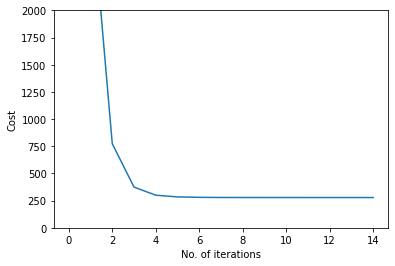

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.plot(costs)
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.ylim(0, 2000)
plt.show()

## Key Takeaways

* Feature Scaling scales  all the features to have smaller values to similar scale.

* Standardization scales the features to have values with 0 mean and unit standard deviation.

* Min-Max scaling scales the features to have values between 0 and 1.

* Feature scaling speeds up the convergence of gradient descent and improves its overall performance.


## Additional Resources

- Aritcle, All about Feature Scaling

  - https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35
    - Read the section 'Why do we need scaling?'



